<xarray.Dataset> Size: 181MB
Dimensions:        (longitude: 360, latitude: 180, altitude_ft: 50, time: 1)
Coordinates:
  * longitude      (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude       (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * altitude_ft    (altitude_ft) float64 400B 500.0 1.5e+03 ... 4.95e+04
  * time           (time) datetime64[ns] 8B 2019-01-31
Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...

Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...


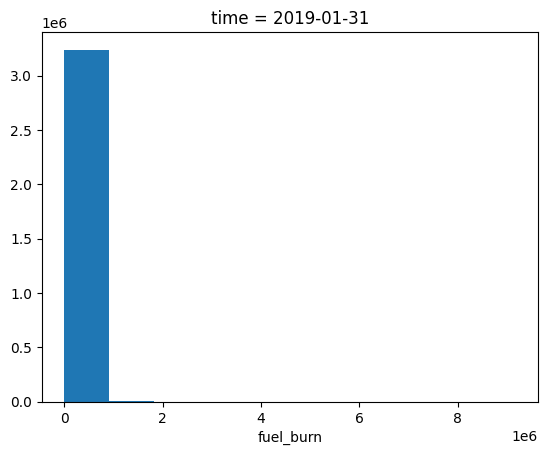

In [2]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\2019-01-monthly.nc"

xrds = xr.open_dataset(file_path)
display(xrds)
# print(xrds.attrs)
# dimensios = xrds.dims
# 
# 
# coords = xrds.coords
# 
data_vars = xrds.data_vars
print(data_vars)
# 
fuel= xrds['fuel_burn']
fuel.plot()
plt.show()
# 
# xrds['emi_air_mass'].plot()
# plt.show()
# h2o = data_vars['H2O'].values
# air = data_vars['emi_air_mass'].values
# q = data_vars['H2O'].values / data_vars['emi_air_mass'].values
# q.plot()
# plt.show()

In [12]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2020_DEPA.nc"

xrds = xr.open_dataset(file_path)
display(xrds)

<xarray.Dataset> Size: 24MB
Dimensions:   (index: 606169)
Coordinates:
  * index     (index) int64 5MB 0 1 2 3 4 ... 606164 606165 606166 606167 606168
Data variables:
    lon       (index) float32 2MB ...
    lat       (index) float32 2MB ...
    plev      (index) float32 2MB ...
    fuel      (index) float32 2MB ...
    CO2       (index) float32 2MB ...
    H2O       (index) float32 2MB ...
    NOx       (index) float32 2MB ...
    distance  (index) float32 2MB ...
Attributes:
    Title:           inventory_example
    Convention:      CF-XXX
    Inventory_Year:  2020
    Reference:       Based on DEPA 2050 data
    URL:             https://elib.dlr.de/142185/

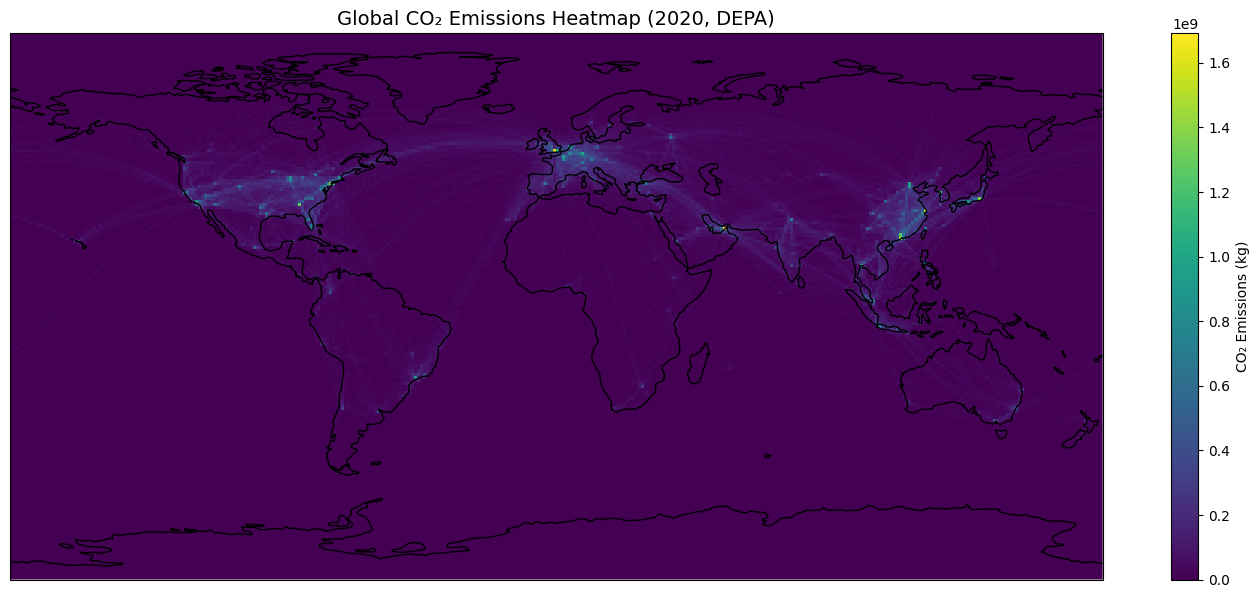

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Load the dataset
ds = xr.open_dataset("emi_inv_2020_DEPA.nc")

# Extract relevant data
lat = ds['lat'].values
lon = ds['lon'].values
co2 = ds['CO2'].values

# Define grid size
lat_bins = np.arange(-90, 91, 1)   # 1-degree latitude bins
lon_bins = np.arange(0, 361, 1) # 1-degree longitude bins

# Bin the data
heatmap, yedges, xedges = np.histogram2d(
    lat, lon, bins=[lat_bins, lon_bins], weights=co2
)

# Plotting
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mesh = ax.pcolormesh(
    xedges, yedges, heatmap, cmap='viridis', shading='auto',
    transform=ccrs.PlateCarree()
)
ax.coastlines()
ax.set_title("Global CO₂ Emissions Heatmap (2020, DEPA)", fontsize=14)
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05)
cbar.set_label("CO₂ Emissions (kg)")
plt.tight_layout()
plt.show()

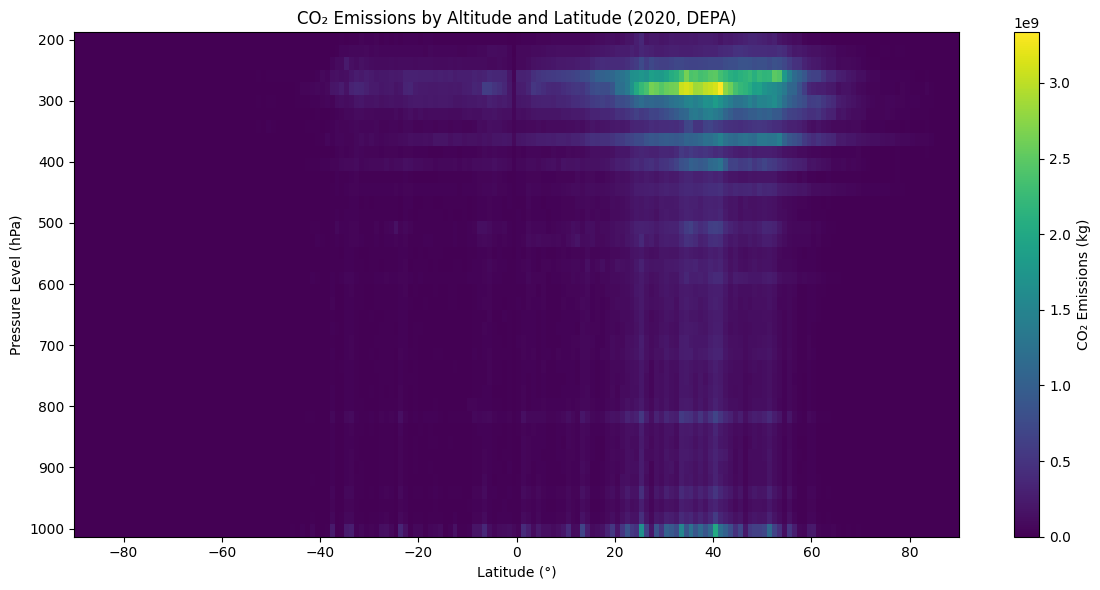

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load NetCDF dataset
ds = xr.open_dataset("emi_inv_2020_DEPA.nc")

# Extract relevant variables
lat = ds['lat'].values
plev = ds['plev'].values  # pressure level in hPa (altitude proxy)
co2 = ds['CO2'].values

# Define bin edges
lat_bins = np.arange(-90, 91, 1)                # Latitude from -90° to 90°
plev_bins = np.unique(plev) #np.linspace(plev.min(), plev.max(), 100)  # Pressure bins

# Create 2D histogram (Y=plev, X=lat)
heatmap, plev_edges, lat_edges = np.histogram2d(
    plev, lat, bins=[plev_bins, lat_bins], weights=co2
)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("CO₂ Emissions by Altitude and Latitude (2020, DEPA)")
plt.xlabel("Latitude (°)")
plt.ylabel("Pressure Level (hPa)")

# Show the image
plt.imshow(
    heatmap,
    aspect='auto',
    origin='lower',
    extent=[lat_bins[0], lat_bins[-1], plev_bins[0], plev_bins[-1]],
    cmap='viridis'
    # Removed norm=colors.LogNorm(...)
)

# Invert y-axis: higher altitude (lower pressure) at the top
plt.gca().invert_yaxis()

# Add colorbar
plt.colorbar(label="CO₂ Emissions (kg)")
plt.tight_layout()
plt.show()

506.3
217.3
239.1
572.1
446.8
572.1
549.4
329.9
506.3
942.14
217.3
262.6
197.5
278.0
288.1
485.8
207.1
315.4
301.9
262.6
278.0
217.3
619.6
288.1
197.5
572.1
315.4
239.1
977.17
250.6
781.9
239.1
696.9
393.2
466.0
410.4
843.1
843.1
843.1
942.14
207.1
188.2
188.2
446.8
428.3
393.2
595.5
644.6
262.6
197.5
329.9
239.1
301.9
644.6
217.3
428.3
572.1
197.5
446.8
1013.25
250.6
301.9
329.9
410.4
410.4
275.1
217.3
329.9
942.1
250.6
572.1
908.1
446.8
275.1
188.2
262.6
301.9
527.5
752.7
393.2
466.0
239.1
278.0
466.0
288.1
262.6
572.1
410.4
315.4
466.0
466.0
301.9
446.8
549.4
977.17
278.0
428.3
275.1
843.1
752.7
1013.25 188.2
[ 188.2   197.5   207.1   217.3   239.1   250.6   262.6   275.1   278.
  288.1   301.9   315.4   329.9   344.9   360.4   376.5   393.2   410.4
  428.3   446.8   466.    485.8   506.3   527.5   549.4   572.1   595.5
  619.6   644.6   670.3   696.9   724.4   752.7   781.9   812.    843.1
  908.1   942.1   942.14  977.17 1013.25]
41


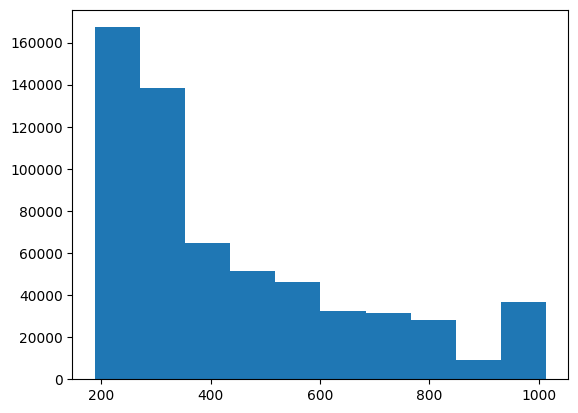

In [6]:
for i in range(len(plev)):
    if i == 100:
        break
    print(plev[i])
print(max(plev), min(plev))
print(plev_bins)
plt.hist(plev)
pleva = np.unique(plev)
print(len(pleva))

<xarray.Dataset> Size: 181MB
Dimensions:        (longitude: 360, latitude: 180, altitude_ft: 50, time: 1)
Coordinates:
  * longitude      (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude       (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * altitude_ft    (altitude_ft) float64 400B 500.0 1.5e+03 ... 4.95e+04
  * time           (time) datetime64[ns] 8B 2019-01-31
Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...

Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...


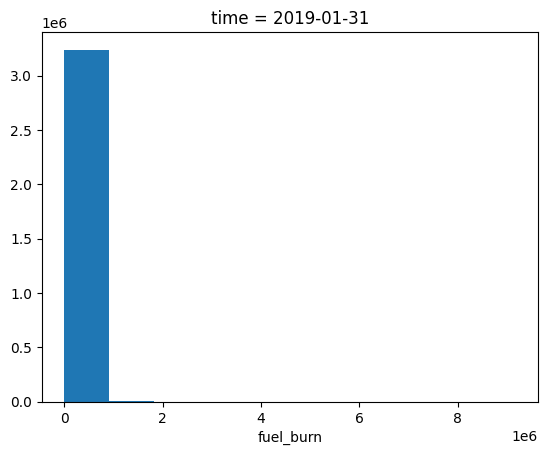

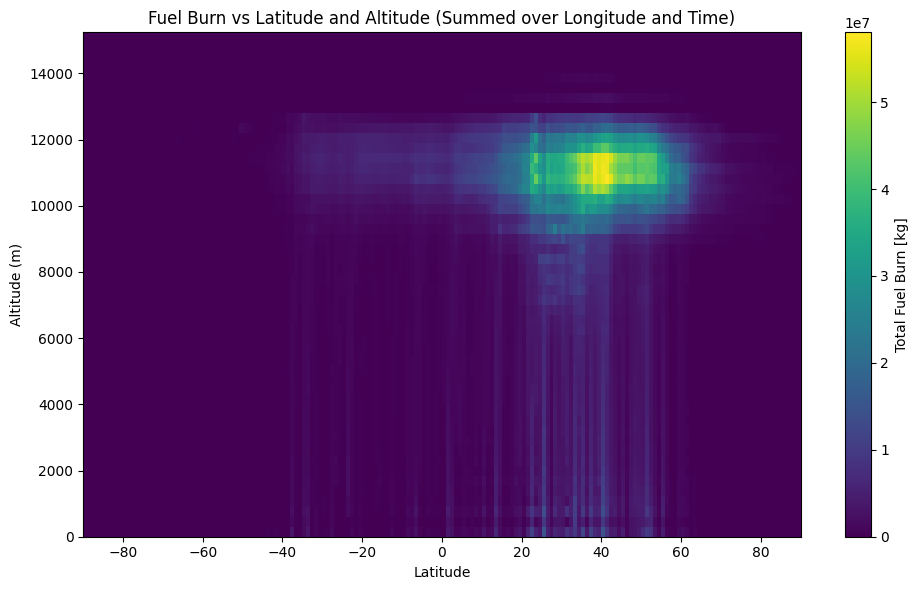

In [7]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\2019-01-monthly.nc"

xrds = xr.open_dataset(file_path)
display(xrds)
# print(xrds.attrs)
# dimensios = xrds.dims
# 
# 
# coords = xrds.coords
# 
data_vars = xrds.data_vars
print(data_vars)
# 
fuel= xrds['fuel_burn']
fuel.plot()
plt.show()
# 
# xrds['emi_air_mass'].plot()
# plt.show()
# h2o = data_vars['H2O'].values
# air = data_vars['emi_air_mass'].values
# q = data_vars['H2O'].values / data_vars['emi_air_mass'].values
# q.plot()
# plt.show()


"""box plot, summed over longitude"""
fuel_burn_sum = xrds['fuel_burn'].sum(dim=['longitude', 'time'])
# Step 2: Plot
plt.figure(figsize=(10, 6))
# Transpose to put altitude on y-axis and latitude on x-axis
alt_m = xrds['altitude_ft']*0.3048
pcm = plt.pcolormesh(
    xrds['latitude'], alt_m, fuel_burn_sum.transpose(),
    shading='auto', cmap='viridis'
)

plt.colorbar(pcm, label='Total Fuel Burn [kg]')
plt.xlabel('Latitude')
plt.ylabel('Altitude (m)')
plt.title('Fuel Burn vs Latitude and Altitude (Summed over Longitude and Time)')
plt.tight_layout()
plt.show()

<xarray.DataArray 'fuel_burn' (longitude: 360, latitude: 180)> Size: 518kB
array([[   0.        ,    0.        ,    0.        , ..., 1569.53760027,
        1028.55182432,  852.68907485],
       [   0.        ,    0.        ,    0.        , ..., 1350.92199561,
        1745.5797794 ,  606.62778968],
       [   0.        ,    0.        ,    0.        , ..., 1181.05966079,
        2131.95383565,  624.25425283],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 1167.50979283,
        1751.99124974,  603.53219731],
       [   0.        ,    0.        ,    0.        , ..., 1526.94684906,
        1334.69872823,  752.35089352],
       [   0.        ,    0.        ,    0.        , ..., 1057.09053592,
        1837.61716644,  451.4986329 ]])
Coordinates:
  * longitude  (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude   (latitude) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

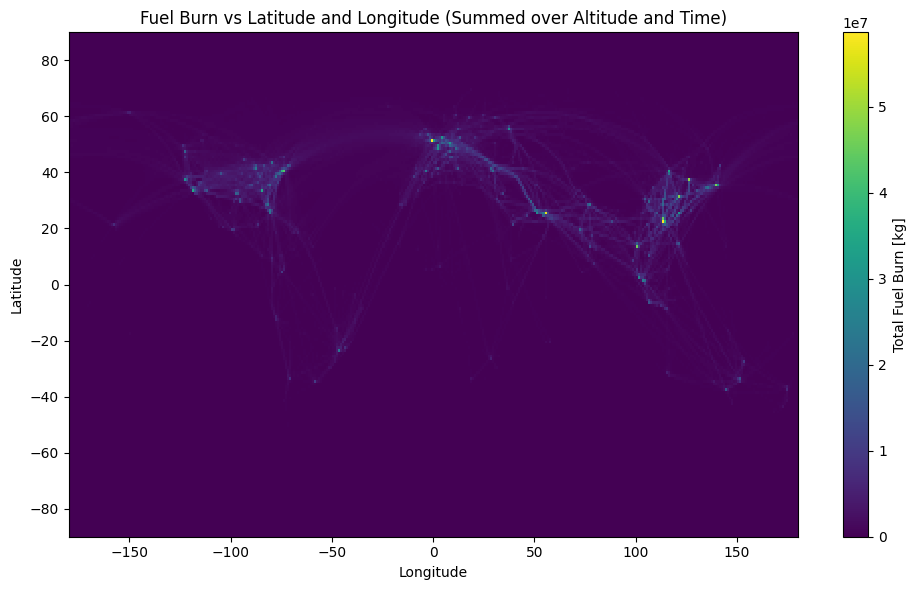

In [8]:
"""box plot, summed over altitude"""
fuel_burn_alt_sum = xrds['fuel_burn'].sum(dim=['altitude_ft', 'time'])
display(fuel_burn_alt_sum)
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    xrds['longitude'], xrds['latitude'], fuel_burn_alt_sum.transpose('latitude', 'longitude'),
    shading='auto', cmap='viridis'
)
plt.colorbar(pcm, label='Total Fuel Burn [kg]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fuel Burn vs Latitude and Longitude (Summed over Altitude and Time)')
plt.tight_layout()
plt.show()

In [9]:
fuel_burn_alt_sum = xrds['fuel_burn'].sum(dim=['altitude_ft', 'time'])

print(fuel_burn_alt_sum.shape)            # Should be (lat, lon)
print(xrds['latitude'].shape)           # Should match fuel_burn_sum's first dimension
print(xrds['longitude'].shape)          # Should match fuel_burn_sum's second dimension

(360, 180)
(180,)
(360,)
